In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, os, string

In [2]:
url = 'https://raw.githubusercontent.com/LocLinh/Word-Embedding/main/sample.csv'

In [4]:
# Đọc input
texts = pd.read_csv(url)
corpus = [x for x in texts['text']]

In [5]:
print(corpus)

['The future king is the prince', 'Daughter is the princess ', 'Son is the prince', 'Only a man can be a king ', 'Only a woman can be a queen', 'The princess will be a queen', 'Queen and king rule the realm', 'The prince is a strong man', 'The princess is a beautiful woman ', 'The royal family is the king and queen and their children', 'Prince is only a boy now', 'A boy will be a man']


In [16]:
#Loại stopword
stopwords_file = 'https://raw.githubusercontent.com/LocLinh/Word-Embedding/main/englishstopwords.csv'
data = pd.read_csv(stopwords_file, sep="\t", encoding='utf-8')
list_stopwords = [y for y in data['stopwords']]
def remove_stopword(text):
    pre_text = []
    words = text.split()
    for word in words:
        if word not in list_stopwords:
            pre_text.append(word)
        text2 = ' '.join(pre_text)
    return text2

In [18]:
# chuẩn hóa dữ liệu
def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
    return text.lower()


In [19]:
corpus2 =[]
for sentences in corpus:
    sentences = remove_stopword(normalize_text(sentences))
    corpus2.append(sentences)
corpus = corpus2

In [20]:
words = []
for sentences in corpus:
    words.extend(sentences.split())
words = list(set(words))
words.sort()

X = np.zeros([len(words), len(words)])

In [22]:
# thống kê số lần đồng xuất hiện (xuất hiện liền kề) của một từ so với các từ khác
for sentences in corpus:
    tokens = sentences.split()
    for i, token in enumerate(tokens):
        if(i == 0):
            X[words.index(token), words.index(tokens[i + 1])] += 1
        elif(i == len(tokens) - 1):
            X[words.index(token), words.index(tokens[i - 1])] += 1
        else:
            X[words.index(token), words.index(tokens[i + 1])] += 1
            X[words.index(token), words.index(tokens[i - 1])] += 1


In [41]:
print(words)
print(X)

['beautiful', 'boy', 'can', 'children', 'daughter', 'family', 'future', 'king', 'man', 'now', 'prince', 'princess', 'queen', 'realm', 'royal', 'rule', 'son', 'strong', 'will', 'woman']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 2. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 

In [23]:
# sử dụng phương pháp svd để tìm ra word vector của từ
la = np.linalg

In [24]:
U, s, Vh = la.svd(X, full_matrices=False)

In [43]:
# vector mỗi từ
for i in range(len(words)):
  print(words[i], U[i])

beautiful [-5.35390987e-02 -3.45298780e-02  2.14701116e-01  2.40312418e-01
  9.92444743e-02  3.33938426e-01  4.93948583e-01  1.82589923e-01
  2.20854450e-01  3.89143010e-01 -1.69057968e-16  1.13592796e-15
  6.65304255e-02  2.06648139e-01 -5.15546880e-02 -2.55226792e-01
  9.96719095e-02  1.02173656e-01 -2.81411016e-01  2.80539795e-01]
boy [-1.39194741e-01 -1.34282831e-02 -3.20722396e-01  3.54319811e-01
  4.24078717e-01 -3.46598466e-01  1.39436205e-01  1.84969131e-01
  2.20178898e-01 -1.85403482e-01  1.49595136e-16 -6.60367195e-16
 -1.43415069e-01  2.24689745e-01 -3.51612156e-01  3.39117836e-01
  6.31437486e-02 -4.34064772e-02 -1.15215612e-16  8.47145581e-17]
can [-3.65300751e-01 -1.16031542e-02  3.89247294e-01 -2.49890400e-02
  2.94679793e-01  2.26780882e-01 -2.41151805e-01 -3.69966327e-01
  3.75836783e-01  1.35225768e-01 -3.64171375e-16  5.86648022e-16
  1.08658128e-01  8.53018138e-02 -1.76243257e-01  4.91527138e-02
 -7.46531115e-02 -7.36207271e-02  2.81411016e-01 -2.80539795e-01]
chil

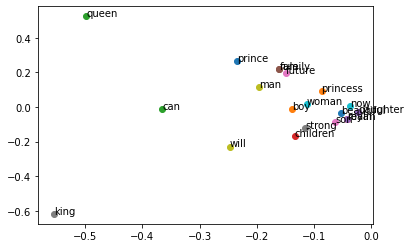

In [40]:
# thể hiện mỗi từ trên đồ thị dùng 2 chiều của vector
for i in range(len(words)):
    plt.scatter(U[i, 0],U[i, 1])
    plt.text(U[i, 0], U[i, 1], words[i])

plt.show()